# Survey Lung Cancer Classification

In [1]:
# import library
import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load Data
data=pd.read_csv('datasets/survey_lung_cancer.csv')
data.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.tail(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [4]:
df=pd.DataFrame(data,columns=data.columns)
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [5]:
df.isnull()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
305,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [7]:
df.isnull().any().any()

False

In [8]:
df.shape

(309, 16)

In [9]:
df.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES


In [10]:
df['GENDER'].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [11]:
age=df['AGE'].value_counts()

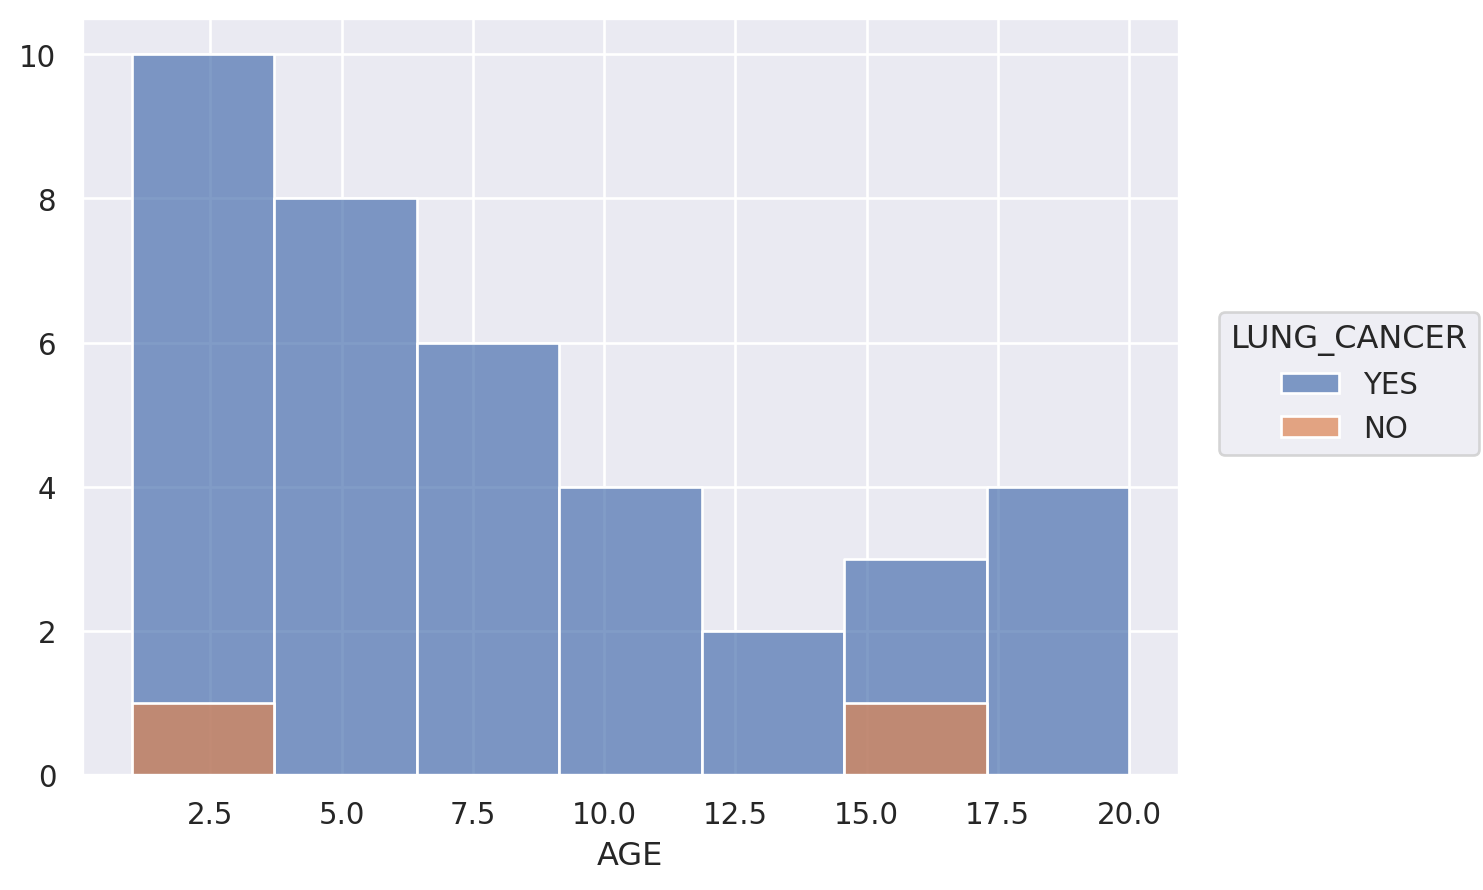

In [12]:
(
    so.Plot(df,x=age,color='LUNG_CANCER')
    .add(so.Bars(),so.Hist())
)

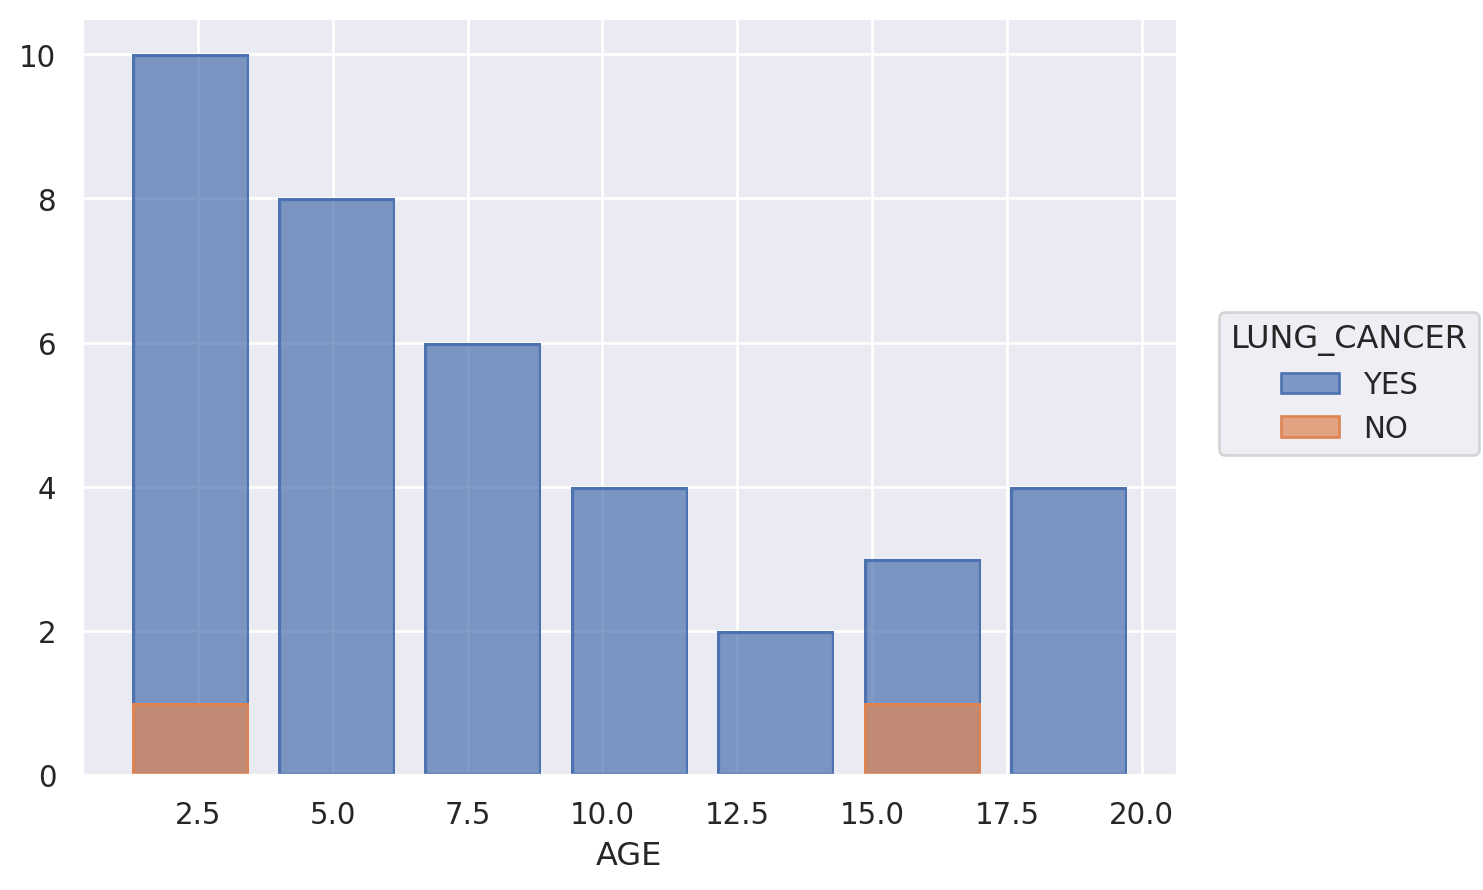

In [13]:
(
    so.Plot(df,x=age,color='LUNG_CANCER')
    .add(so.Bar(),so.Hist())
)

In [14]:
df.head(3)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO


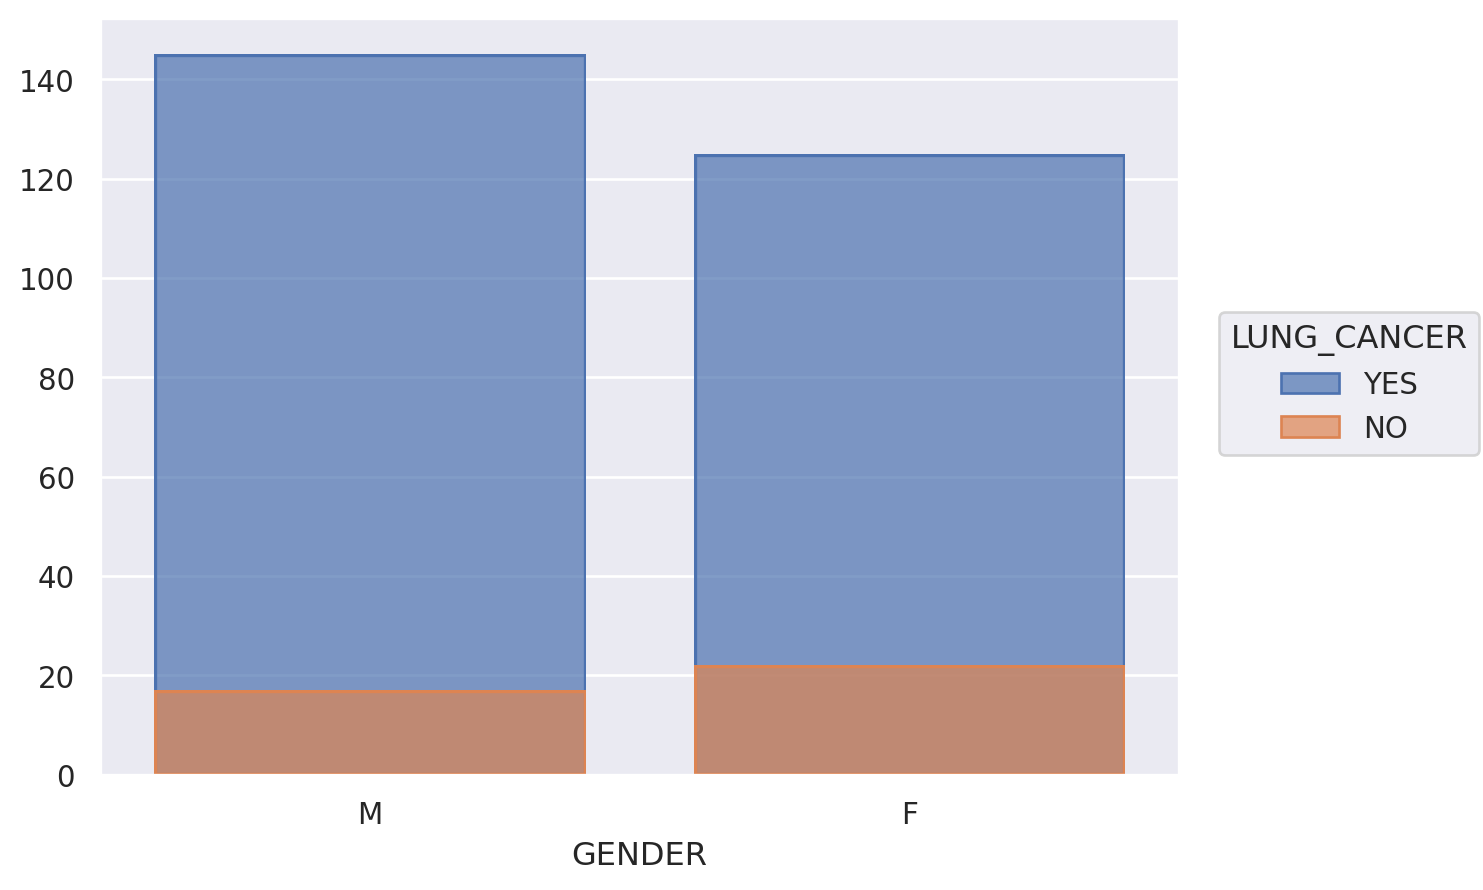

In [15]:
(
    so.Plot(df,x=df['GENDER'],color='LUNG_CANCER')
    .add(so.Bar(),so.Hist())
)

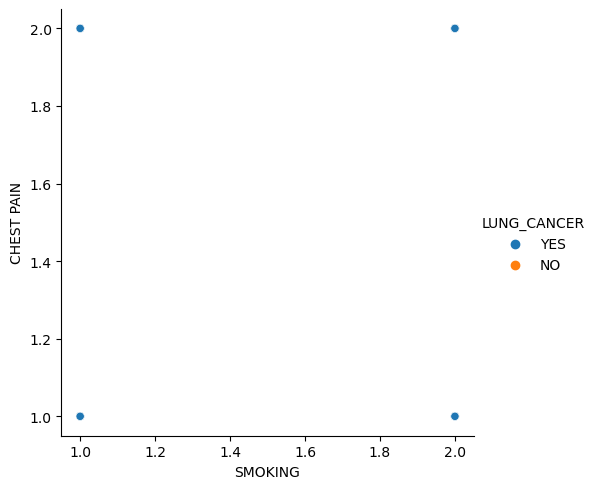

In [16]:
sns.relplot(df,x='SMOKING',y='CHEST PAIN',hue='LUNG_CANCER')

In [17]:
df.head(2)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES


In [18]:
df["GENDER"].value_counts()

M    162
F    147
Name: GENDER, dtype: int64

In [19]:
df["AGE"].value_counts()

64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64

In [20]:
df["SMOKING"].value_counts()

2    174
1    135
Name: SMOKING, dtype: int64

In [21]:
df['YELLOW_FINGERS'].value_counts()

2    176
1    133
Name: YELLOW_FINGERS, dtype: int64

In [22]:
df['ANXIETY'].value_counts()

1    155
2    154
Name: ANXIETY, dtype: int64

In [23]:
df['PEER_PRESSURE'].value_counts()

2    155
1    154
Name: PEER_PRESSURE, dtype: int64

In [24]:
df['CHRONIC DISEASE'].value_counts()

2    156
1    153
Name: CHRONIC DISEASE, dtype: int64

In [25]:
df['WHEEZING'].value_counts()

2    172
1    137
Name: WHEEZING, dtype: int64

In [26]:
df['ALCOHOL CONSUMING'].value_counts()

2    172
1    137
Name: ALCOHOL CONSUMING, dtype: int64

In [27]:
df['COUGHING'].value_counts()

2    179
1    130
Name: COUGHING, dtype: int64

In [28]:
df['SHORTNESS OF BREATH'].value_counts()

2    198
1    111
Name: SHORTNESS OF BREATH, dtype: int64

In [29]:
df['SWALLOWING DIFFICULTY'].value_counts()

1    164
2    145
Name: SWALLOWING DIFFICULTY, dtype: int64

In [30]:
df['CHEST PAIN'].value_counts()

2    172
1    137
Name: CHEST PAIN, dtype: int64

In [31]:
df['CHEST PAIN'].value_counts()

2    172
1    137
Name: CHEST PAIN, dtype: int64

In [32]:
df['LUNG_CANCER'].value_counts()

YES    270
NO      39
Name: LUNG_CANCER, dtype: int64

## Exploratory Data Analysis

In [33]:
df.head(30)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


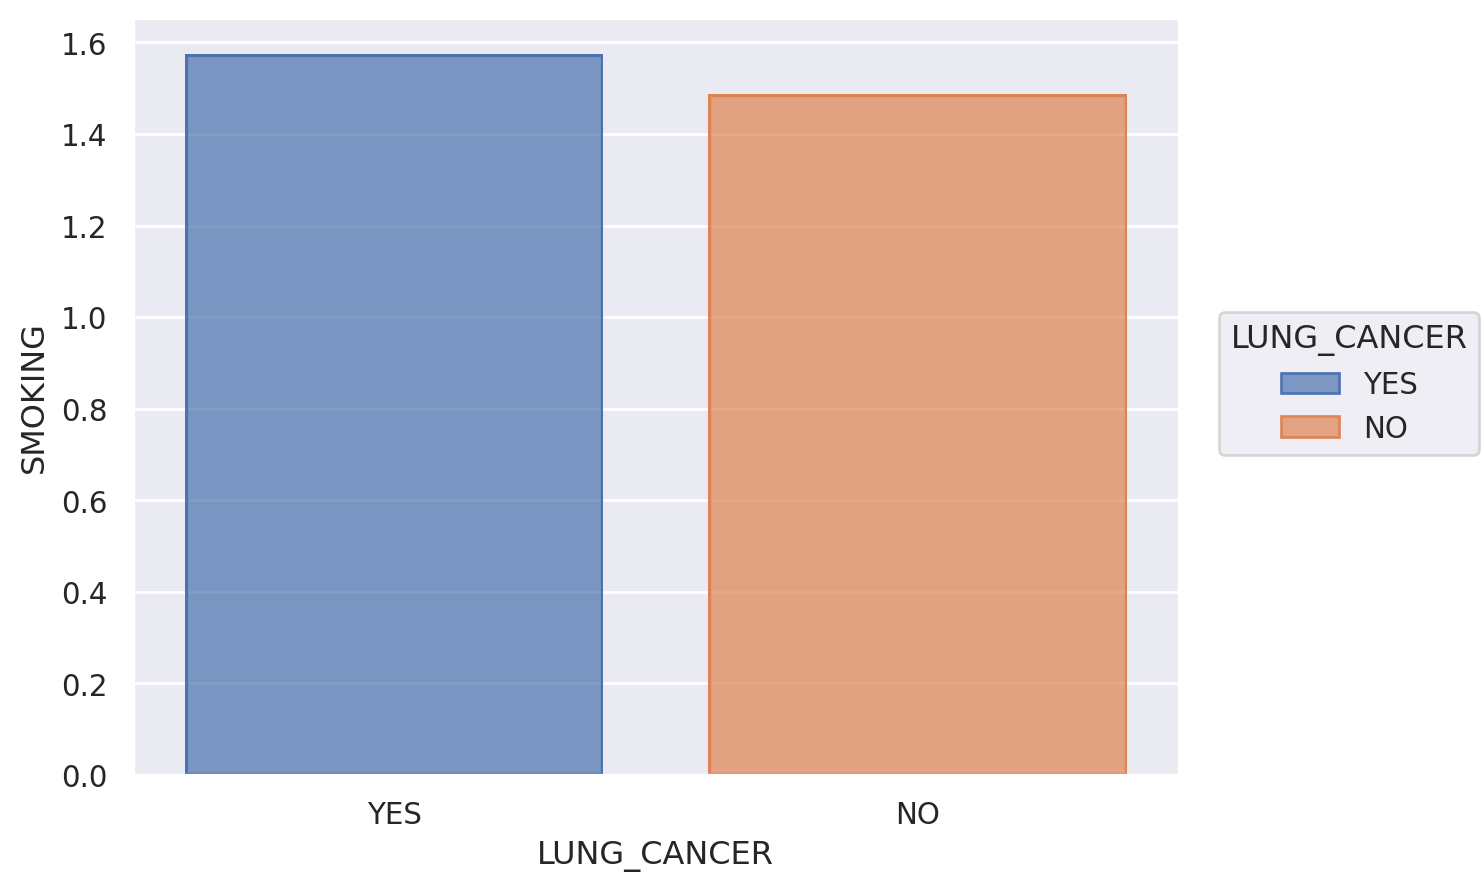

In [34]:
(
    so.Plot(df,x='LUNG_CANCER',y='SMOKING',color='LUNG_CANCER')
    .add(so.Bar(),so.Agg())
)

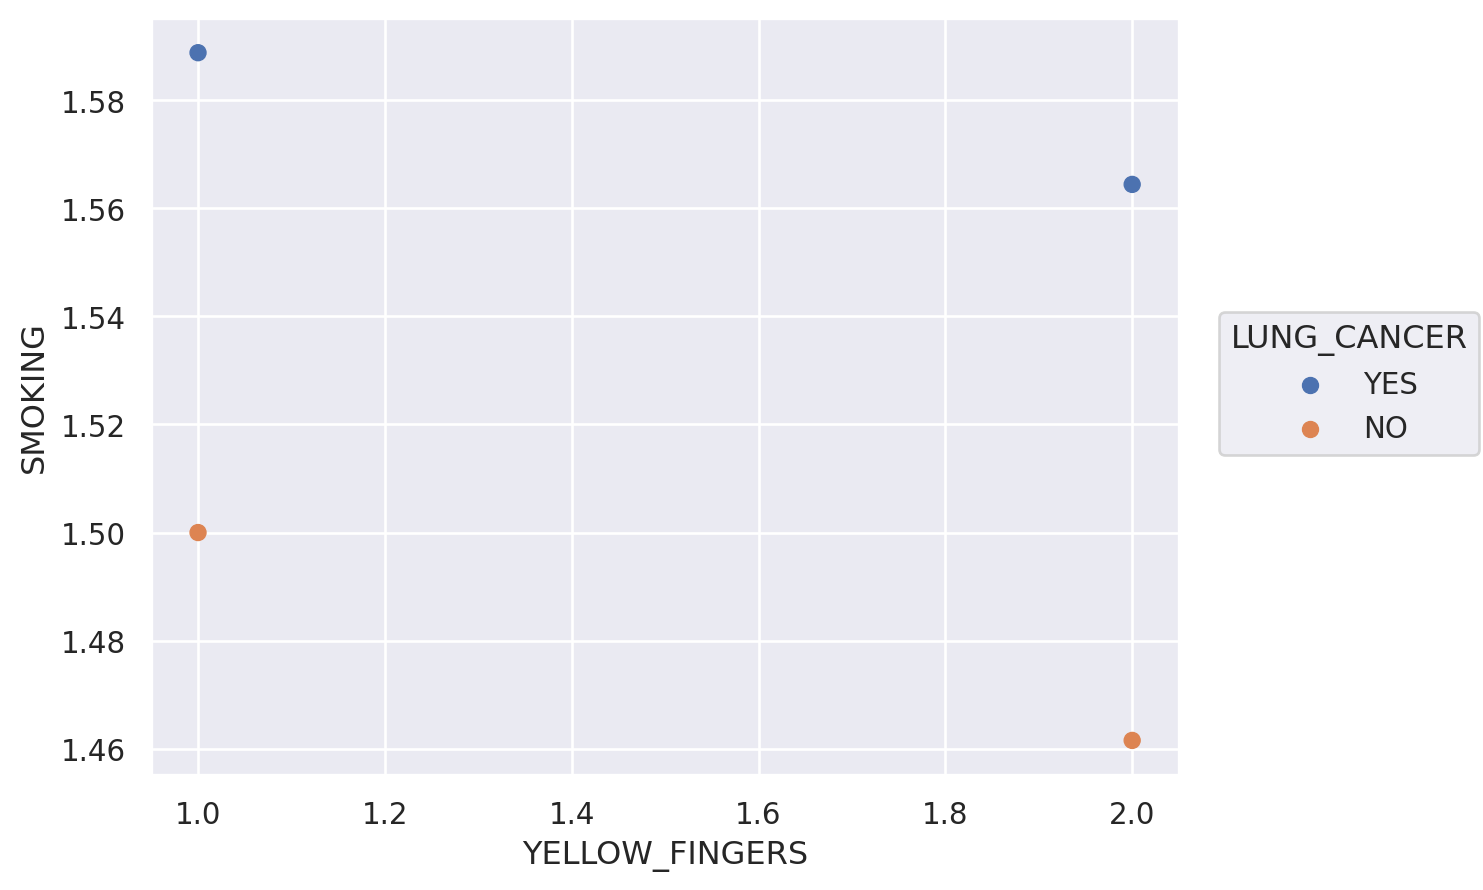

In [35]:
(
    so.Plot(df,x='YELLOW_FINGERS',y='SMOKING',color='LUNG_CANCER')
    .add(so.Dot(),so.Agg())
)

In [36]:
df.head(1)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES


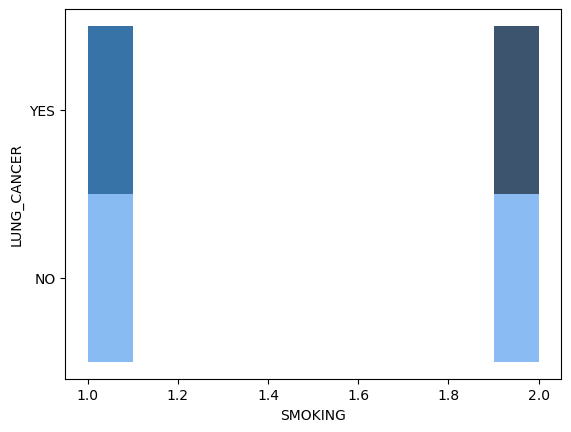

In [37]:
sns.histplot(df,x='SMOKING',y='LUNG_CANCER')
plt.show()

## Data Preprocessing


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [45]:
x=df.drop(['LUNG_CANCER'],axis=1)
y=df['LUNG_CANCER']


In [42]:
x.shape

(309, 15)

In [43]:
df.shape

(309, 16)